In [46]:
# notebook import

from ipynb.fs.full.data_processing import *

In [47]:
# list of colors corresponding to specific wells used in figures
colors = ['sienna', 'tomato', 'orange', 'darkgoldenrod', 'yellowgreen', 'limegreen', 'teal', 'deepskyblue', 'royalblue', 'slateblue', 'darkviolet', 'orchid', 'pink']


In [57]:
# interval for times of matrices
interval = 500

In [58]:
# function declaration

# input: None (references the `interval` global input parameter)
# output: list of timesteps (times), and intervals at which they were gathered (intervals)
def get_times():
    times = []
    intervals = []
    for i in range(len(timestep_scaled)):
        if timestep_scaled[i] >= interval*(len(times)+1):
            times.append(i)
            intervals.append(interval*(len(times)))
    return times, intervals


In [59]:
def main(): 
    # get the times and intervals for which the matrices will be made
    times, intervals = get_times()
    
    global bin_edges_dict
    bin_edges_dict = create_bin_edges_dict()
        
    for name, ref in zip(feature_name_list, feature_ref_list):
        
        bins = bin_edges_dict[name]
        
        for (t, i) in zip(times, intervals):
            
            for well, color in zip(well_id_list, colors):
                data = (experiment_dict[well].loc[experiment_dict[well][timestep_ref] == t])[ref]
                plt.hist(data, bins, color=color, label=well)
                
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            plt.title(f'{proper_feature[name]} distribution by well ({i} min)')
            plt.xlabel(f'{proper_feature[name]}')
            plt.ylabel('Number of Cells')
            plt.savefig(results_fpath + f'animated_histograms/all/{name}_all_{i}.png', dpi=300, bbox_inches='tight')
            plt.show()
    
    return 

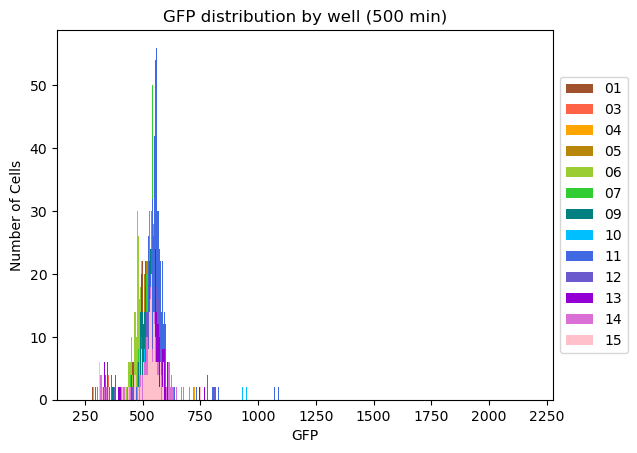

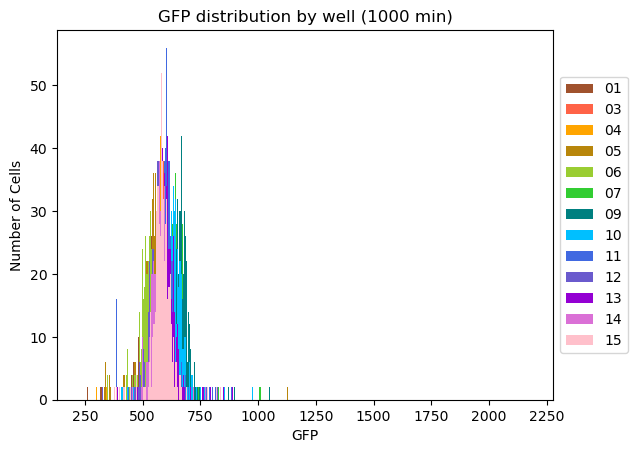

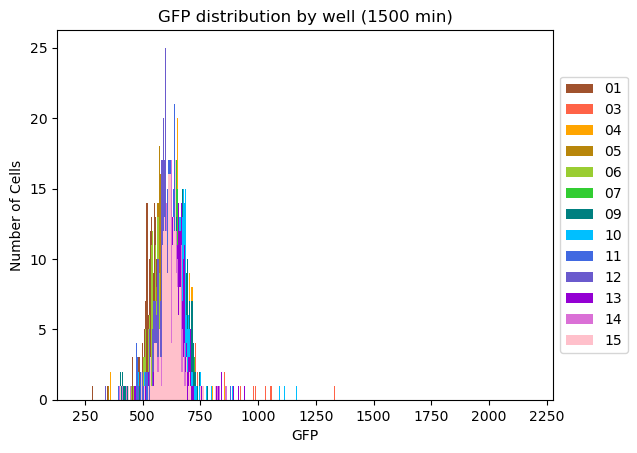

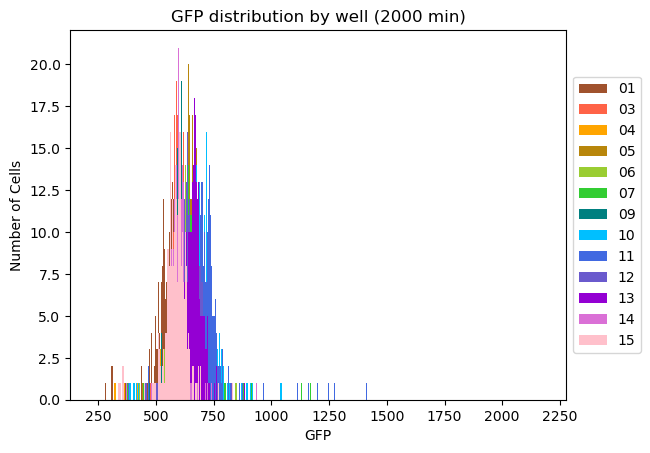

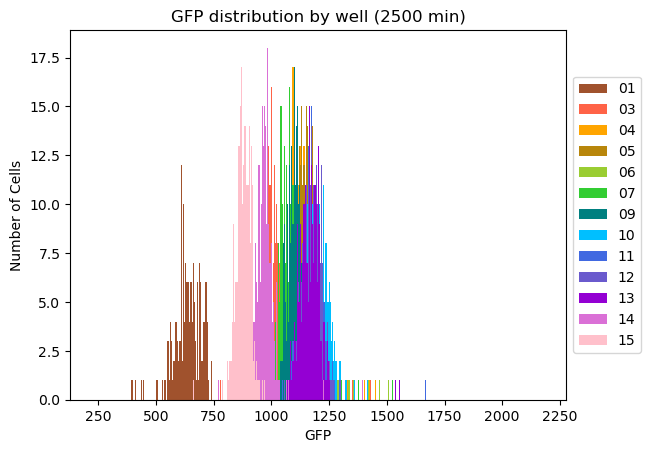

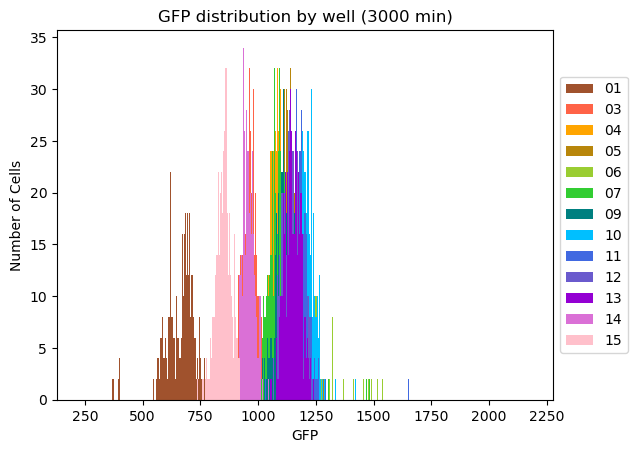

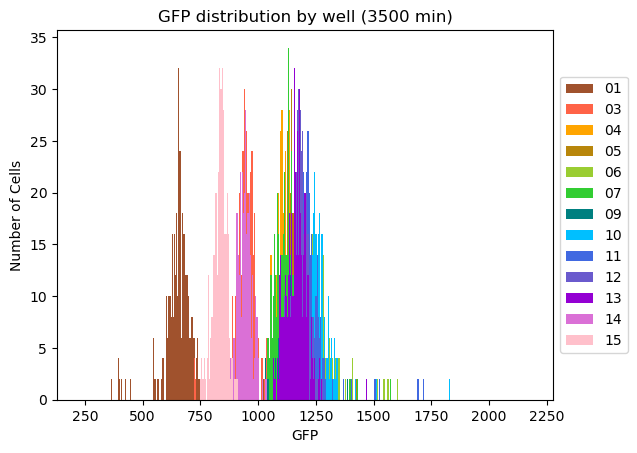

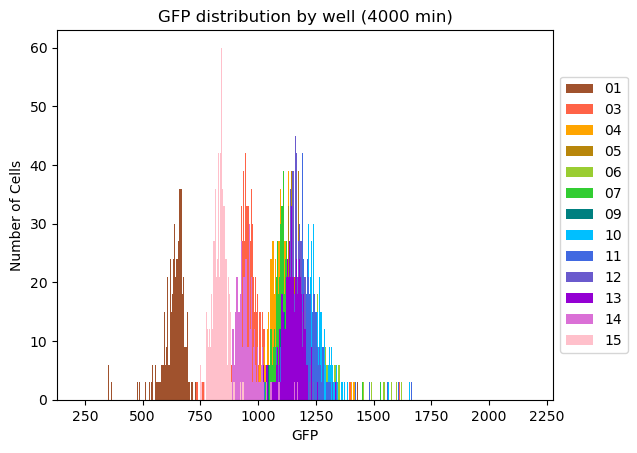

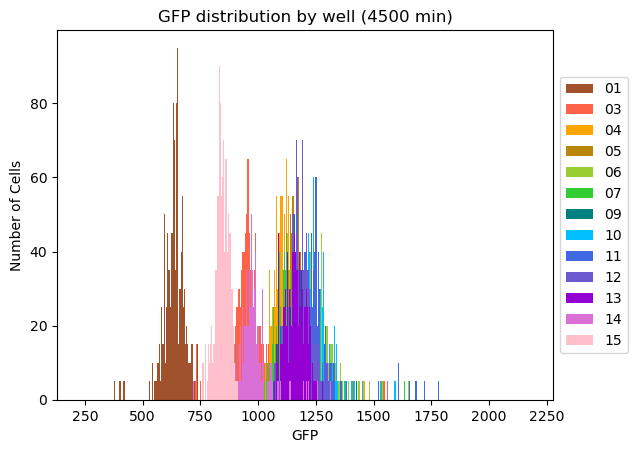

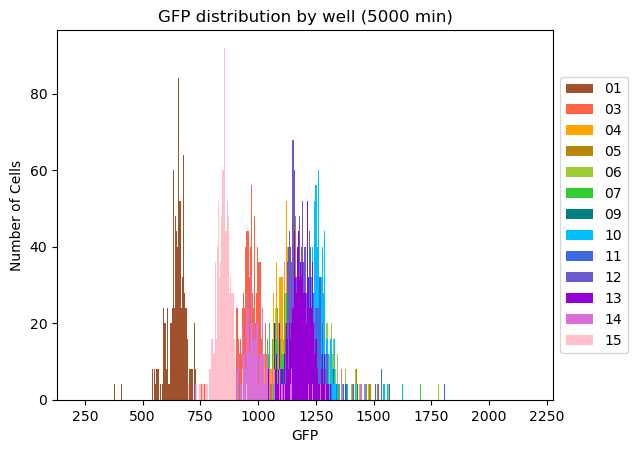

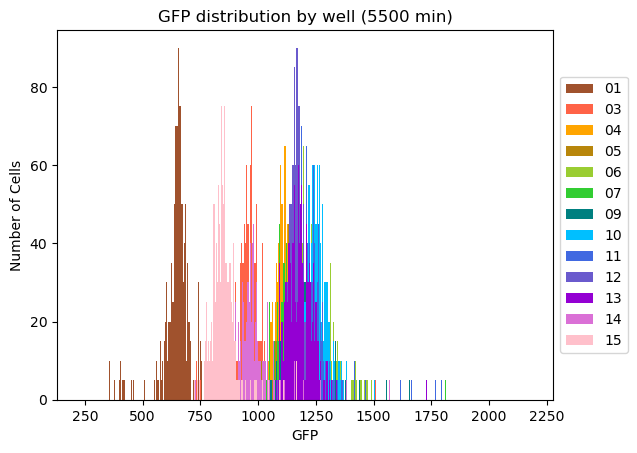

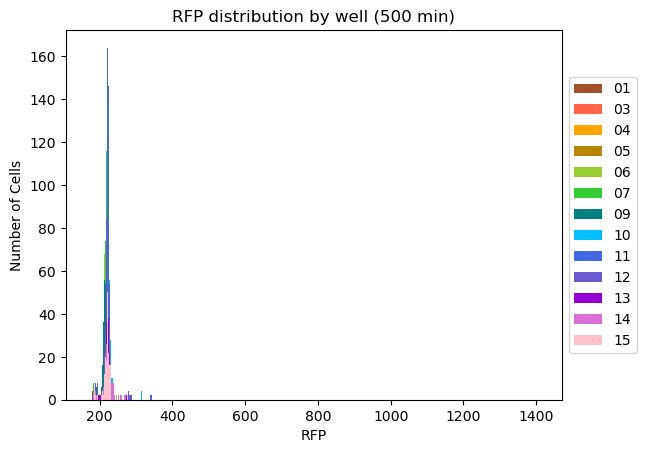

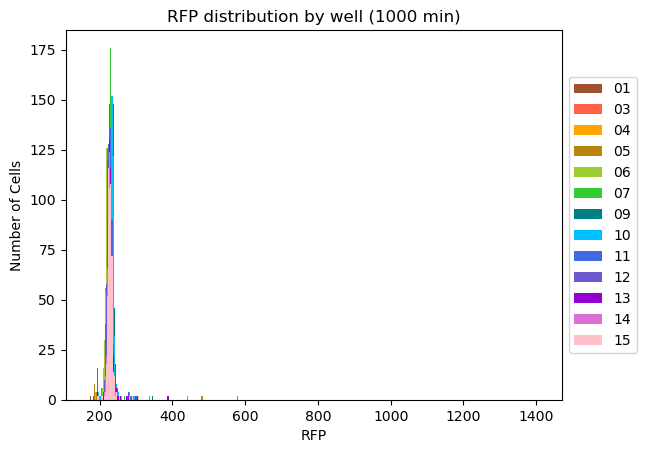

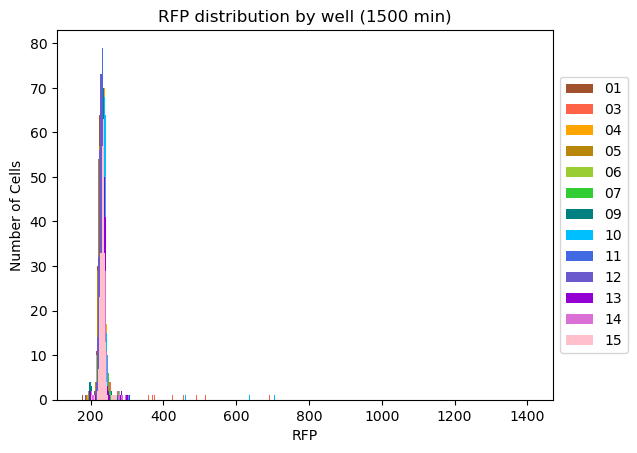

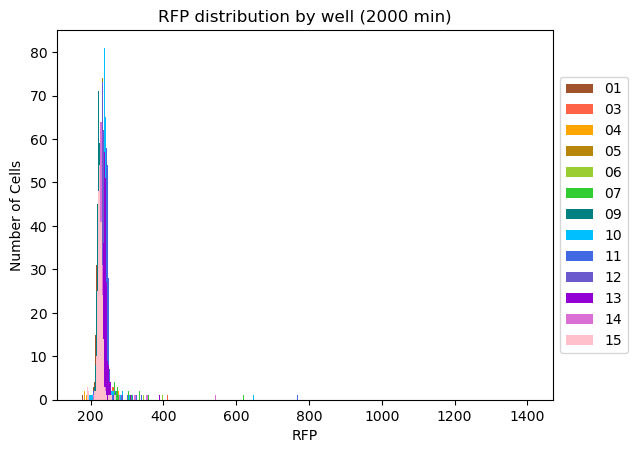

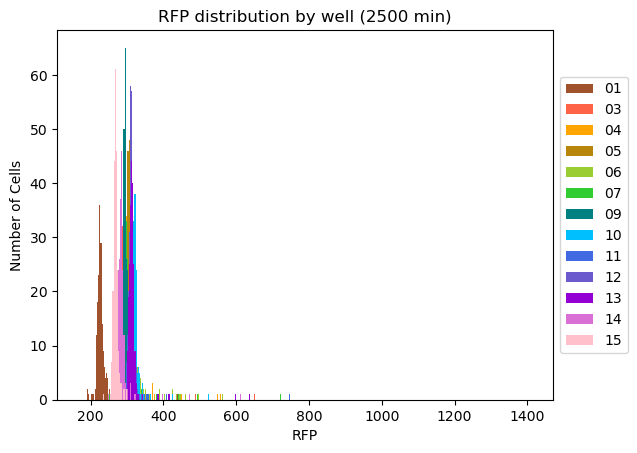

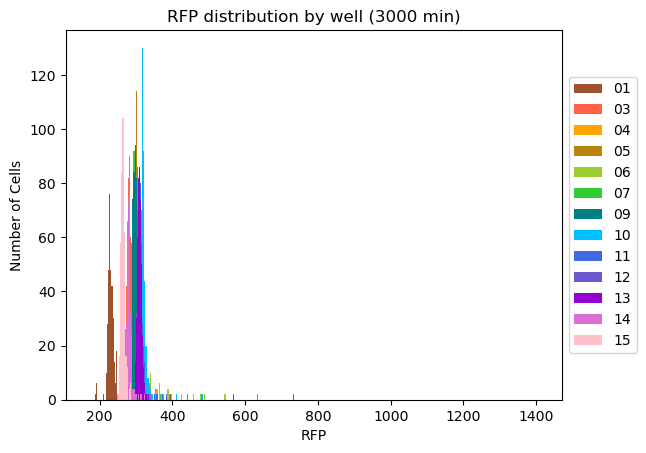

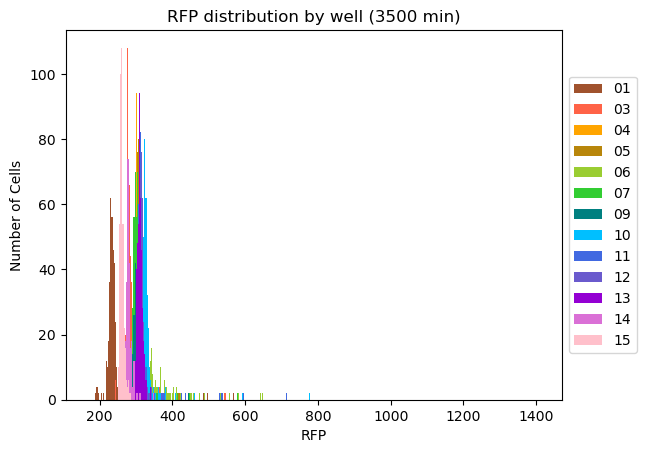

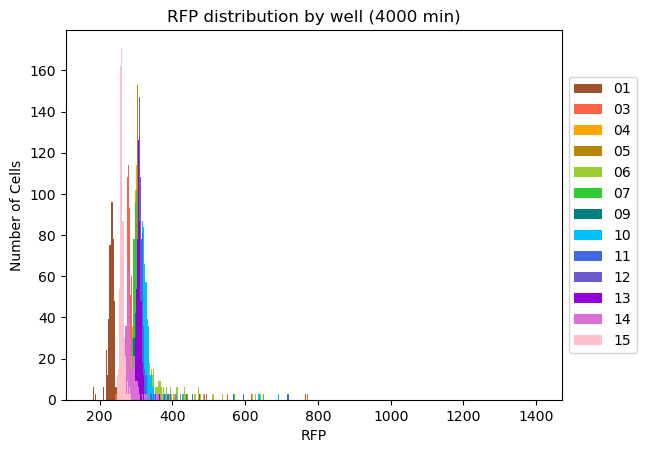

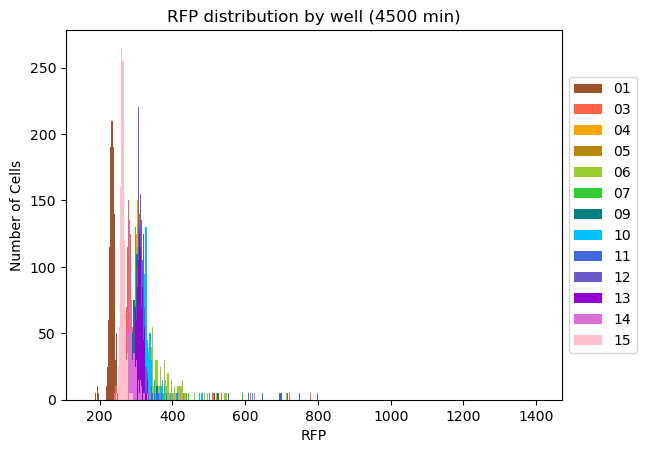

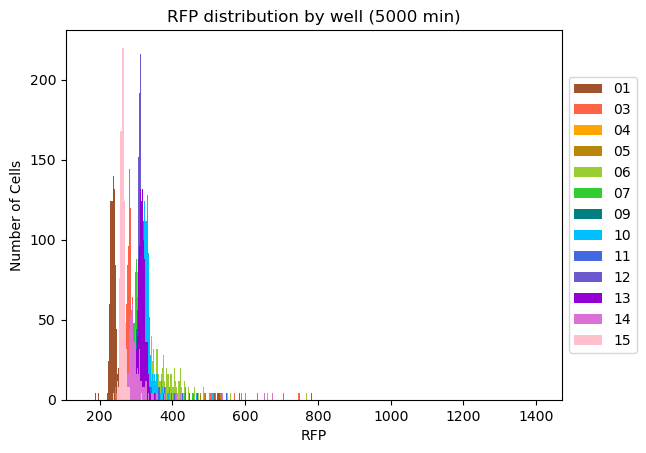

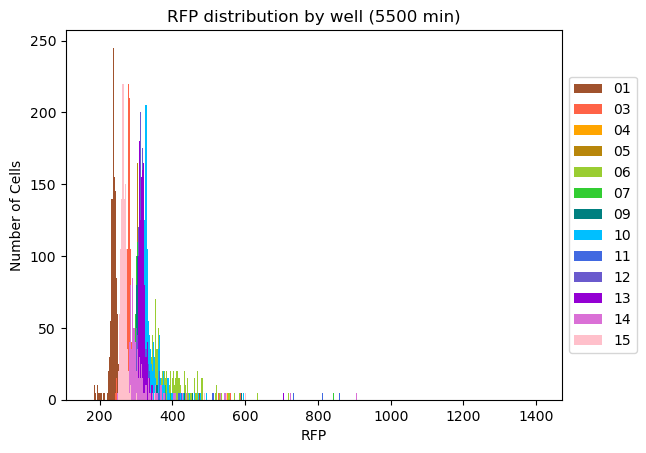

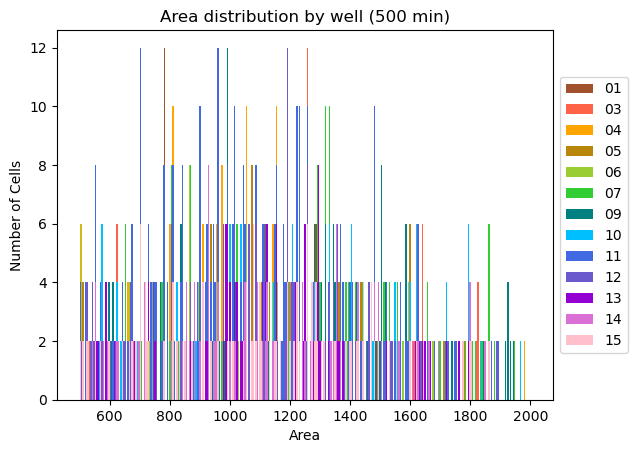

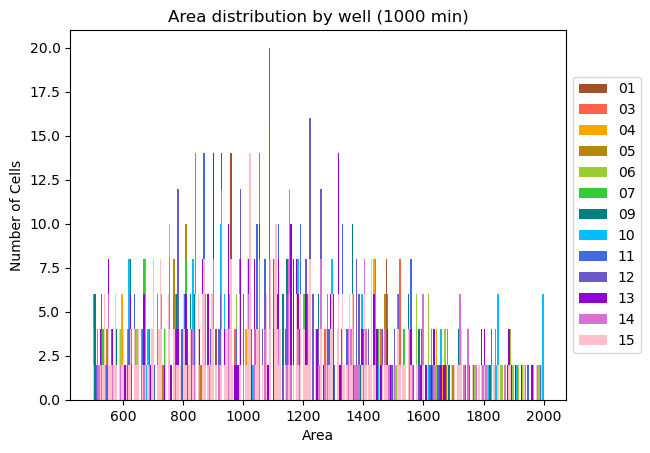

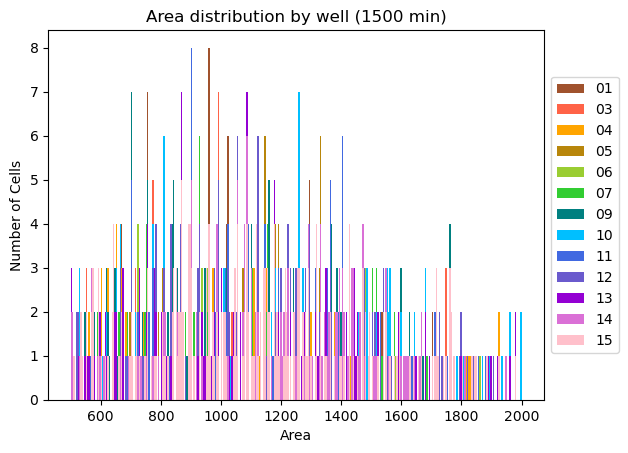

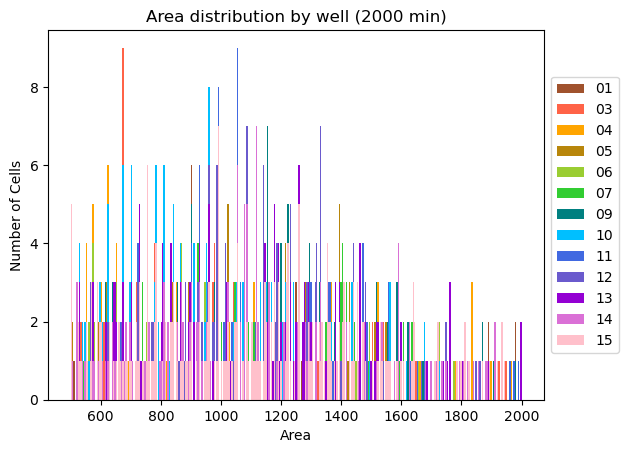

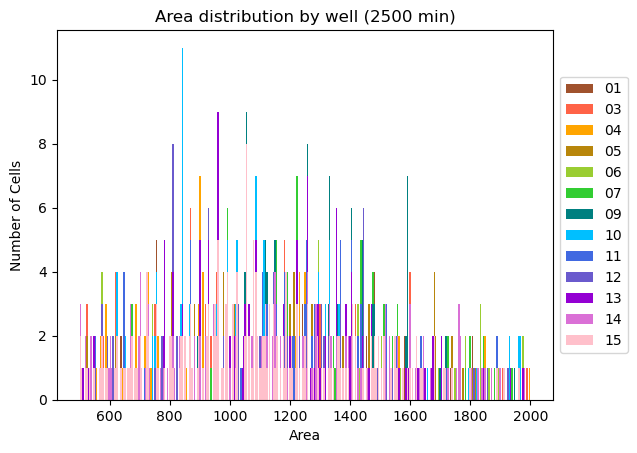

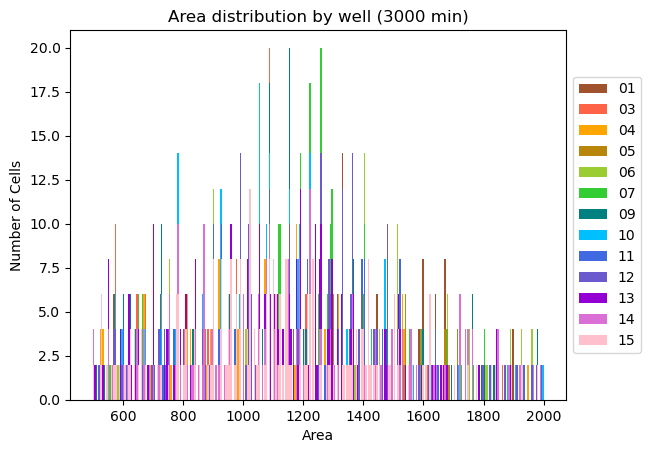

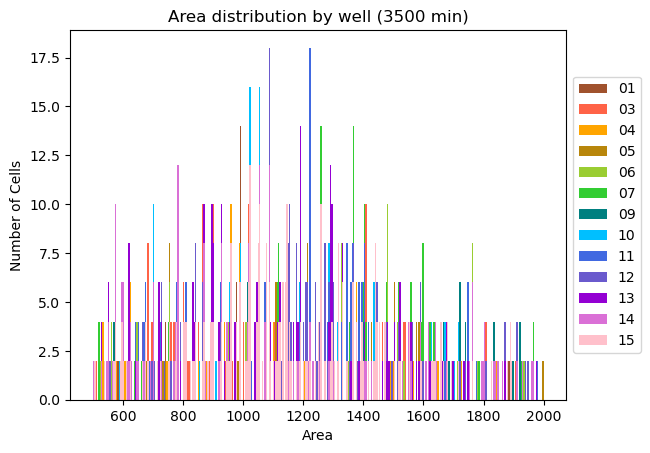

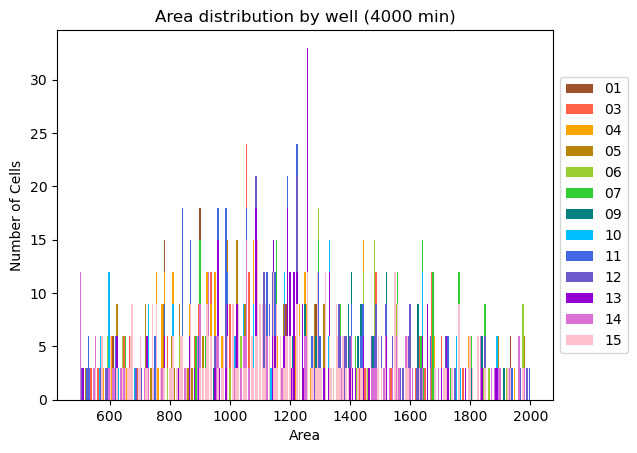

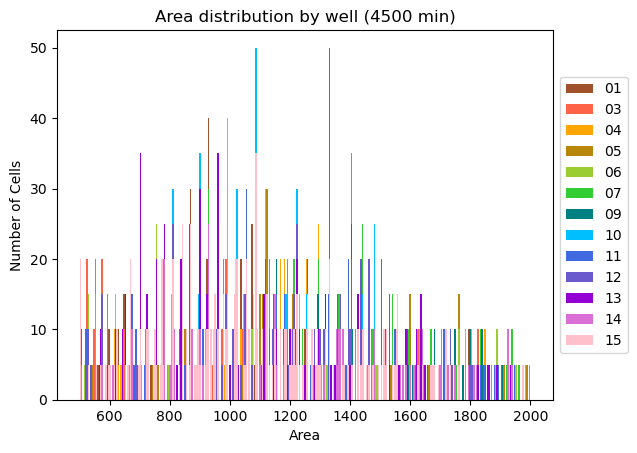

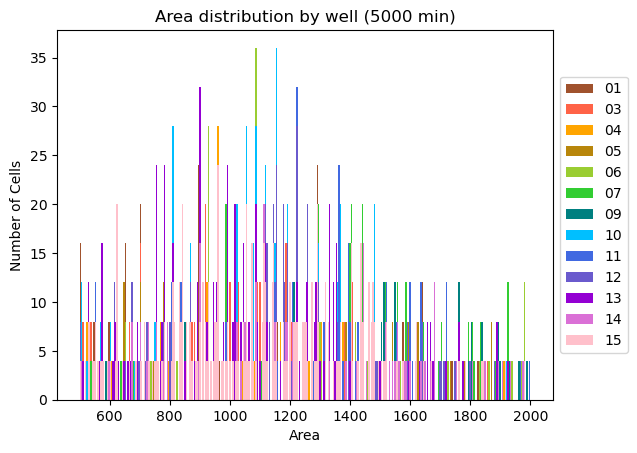

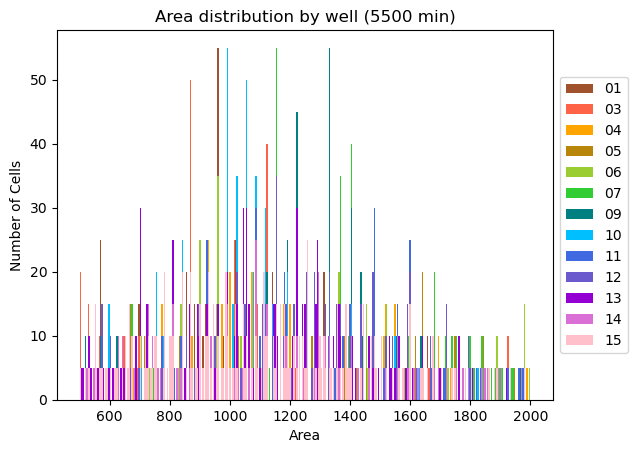

In [60]:
main()